# ДЗ1

- Студент: Алексей Ярошенко
- Email на портале: aleksey.yaroshenko@gmail.com

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


**Ответ:** 

Обозначим:
- $G$ (gulity) - подсудимый виновен
- $B$ (blood) - у подсудимого редкая группа крови



Прокурор оценил вероятность $P(B)$ того, что у подсудимого редкая группа крови, которая была найдена на месте убиства. 

А должен был оценить $P(G|B)$ вероятность того, что подозреваемый - убийца, при условии, что у подозреваемого редкая группа крови.

$P(G|B) = \frac{P(G) P(B| G)}{P(B)} =
\frac{P(G) P(B| G)}{P(B|G)P(G) + P(B|\overline{G})P(\overline{G})}$

$P(B| G) = 1$ - вероятность того, что если просудимый виновен, у него редкая группа крови

$P(B|\overline{G}) = 0.01$ - вероятность того, если подсудимый невиновен, у него редкая группа крови

$P(G|B_k, B_s) =
\frac{P(G) P(B| G)}{P(B|G)P(G) + P(B|\overline{G})P(\overline{G})} =
\frac{P(G)}{P(G) + 0.01 \cdot (1-P(G))} = 
\frac{P(G)}{0.99 \cdot P(G) + 0.01}
$

Визуализируем зависимости $P(G|B)$ от $P(G)$ (вероятность виновности подозреваемого в зависимости от других априорных знаний о том, насколько подозреваемый виновен):

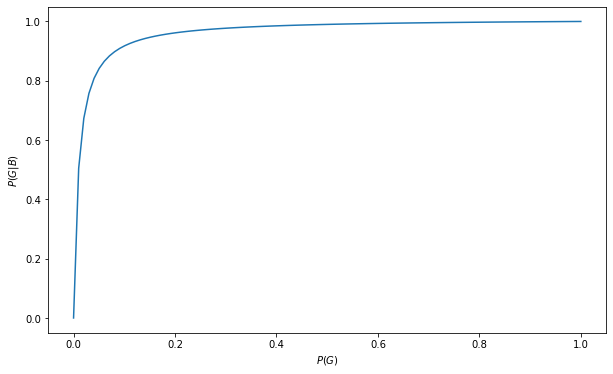

In [91]:
def p_func(p_g):
    return p_g / (0.99 * p_g + 0.01)
    
p_g = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
plt.plot(p_g, p_func(p_g))
plt.xlabel('$P(G)$')
plt.ylabel('$P(G|B)$');

In [67]:
print(f'{p_func(1/2):.4f}')

0.9901


**Попробуем интерпретировать:** Чтобы заявлять о виновности подсудимого, нужны другие доказательства кроме его группы крови. 

Если есть хоть довольно веские доказательства виновности подозреваемого кроме группы крови, то можно делать выводы. 

К примеру, если есть доказательства кроме группы крови, что подсудимый виновен с вероятностью 50% ($P(G) = 0.5$), то вероятность его вины 99%. 

Если же все доказательства свидетельствуют против виновности ($P(G) = 0$), то считать подозреваемого виновным некорректно.

## Задание 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. 

В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

**Ответ:**

Адвокат оценил вероятность виновности случайно выбранного человека из города с населением 1 млн с редкой группой крови. Т.е. при априорной вероятности $P(G) = \frac{1}{1000000}$ Эта веротяность действительно равна 0.01%. Но исключать группу крови из материалов дела нельзя, т.к. вместе с другими даже незначительными доказательствами группа крови может стать решающим фактором того, что вероятность вины подсудимого болет большой. 

К примеру, даже если другие доказателства будут говорить, что вероятность невиновности подсудимого - 95%, а виновности - только 5%, то группа крови повернет все так, что, учитывая ее, вероятность виновности подсудимого станет 84%

К тому же, адвокат не прав в том, что рассматривает в качестве подозреваемый все население города. Из этих 10000 с редкой группой крови человек убийство могли совершить гораздо меньше людей: кто-то еще младенец, кому-то сложно передвигаться, у кого-то железное алиби и прочее. Не говоря уже о мотиве преступления.

P.S.: адвокат может и не прав с точки зрения теории вероятности, но свое дело знает, убедителен и действиет крайне целесообразно :)

In [83]:
f'{p_func(1/1_000_000):.4f}', f'{p_func(0.05):.4f}'

('0.0001', '0.8403')

## Задание 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

**Ответ:**

$P(covid=1|test=1) = \frac{P(covid = 1) P(test=1|covid=1)}{P(test=1)} = 
\frac{P(covid = 1) P(test=1|covid=1)}{P(test=1|covid=0)P(covid=0) + P(test=1|covid=1)P(covid=1)}
$

$P(covid=1|test=0) = \frac{P(covid = 1) P(test=0|covid=1)}{P(test=0)} = 
\frac{P(covid = 1) P(test=0|covid=1)}{P(test=0|covid=0)P(covid=0) + P(test=0|covid=1)P(covid=1)}
$

In [166]:
def p_covid_test(fpr=0.05, fnr=0.05, p_covid=0.01, test_positive=True):
    if test_positive:
        return p_covid * (1 - fnr) / (fpr * (1 - p_covid) + (1 - fnr) * p_covid)
    else:
        return p_covid * fnr / ((1 - fpr) * (1 - p_covid) + fnr * p_covid)
    
p_covid_test()

0.16101694915254236

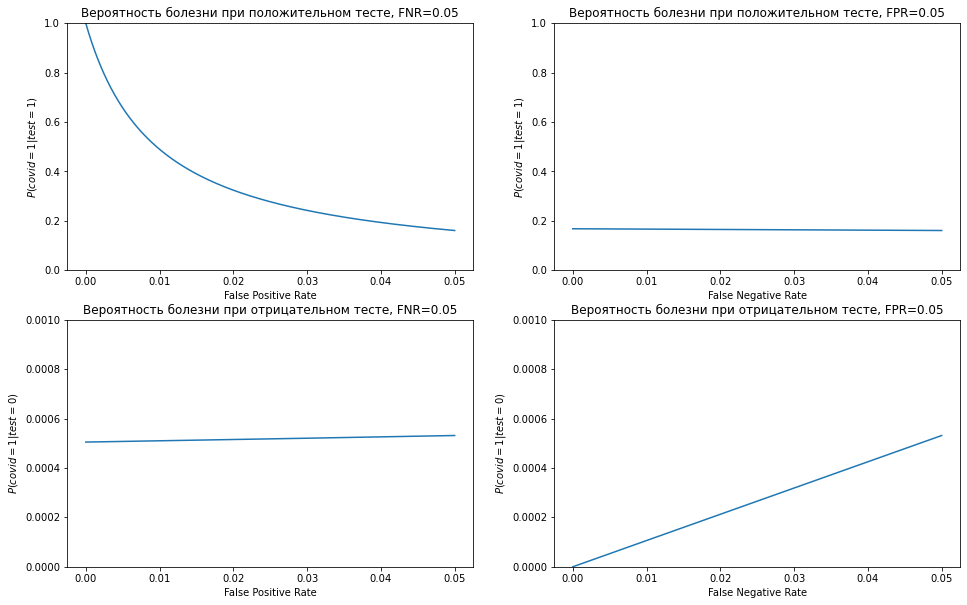

In [180]:
fpr = np.linspace(0, 0.05, 1000)
fnr = np.linspace(0, 0.05, 1000)

y_lim_positive_test = (0, 1)
y_lim_negative_test = (0, 0.001)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

ax1.plot(fpr, p_covid_test(fpr=fpr, test_positive=True))
ax1.set_ylim(y_lim_positive_test)        
ax1.set_title('Вероятность болезни при положительном тесте, FNR=0.05')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('$P(covid=1|test=1)$')


ax2.plot(fnr, p_covid_test(fnr=fnr, test_positive=True))
ax2.set_ylim(y_lim_positive_test)                                             
ax2.set_title('Вероятность болезни при положительном тесте, FPR=0.05')
ax2.set_xlabel('False Negative Rate')
ax2.set_ylabel('$P(covid=1|test=1)$')

ax3.plot(fpr, p_covid_test(fpr=fpr, test_positive=False))
ax3.set_ylim(y_lim_negative_test)
ax3.set_title('Вероятность болезни при отрицательном тесте, FNR=0.05')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('$P(covid=1|test=0)$')


ax4.plot(fnr, p_covid_test(fnr=fnr, test_positive=False))
ax4.set_ylim(y_lim_negative_test)
ax4.set_title('Вероятность болезни при отрицательном тесте, FPR=0.05')
ax4.set_xlabel('False Negative Rate')
ax4.set_ylabel('$P(covid=1|test=0)$');

Допустим, мы можем снизить FPR или FNR на 0.02, с 0.05 до 0.03.

Для наглядности, посмотрим, какой будет эффект для, к примеру, 10000 человек, при изменении FPR и FNR на 0.02

In [204]:
N = 10000
delta = 0.02

fpr_effect = (p_covid_test(fpr=(0.05 - delta), test_positive=True) - p_covid_test(test_positive=True)) * N
fnr_effect = (p_covid_test(test_positive=False) - p_covid_test(fnr=(0.05 - delta), test_positive=False)) * N

print(f'Улучшение: {delta}\nFPR эффект: {fpr_effect:.0f} / {N}\nFNR эффект: {fnr_effect:.0f} / {N}')

Улучшение: 0.02
FPR эффект: 813 / 10000
FNR эффект: 2 / 10000


- При снижении FNR на 0.02 мы сможем обнаружить среди 10000 человек на 2 больных больше.
- При снижении FPR на 0.02 мы не будем лечить от болезни здоровых 813 человек из 10000.

Т.к. смертность от covid-19 не такая высокая, как от разных страшных болезней и цена False Negative срабатывания не критичная, то я считаю, что эффект от обнаружения +2 больных на 10000 человек намного менее значим, чем если бы мы не напугали и не лечили здоровых 813 человек на 10000. К тому же, ложноположительные срабатывания - это нагрузка на врачей, которым потом нужно проверять здоровых людей и тратить на них время. К тому же, здоровый человек может заразиться при, к примеру, повторном посещении врача.

Поэтому, я бы рекомендовал врачам сосредоточиться на сокращении False Positive ошибок.